In [1]:
#importowanie wszystkich niezbędznych dla analizy bibliotek
import pandas as pd
import numpy as np
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, precision_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#wczytanie zbioru danych pobranego ze strony Uniewersytetu Californii, UC Irvine Machine Learning Repository
df = pd.read_csv('/content/drive/MyDrive/credit+approval/crx.data')
df

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [4]:
#interpretacja oraz nadanie nowych nazw kolumnom
new_columns = ['Płeć', 'Wiek', 'Zadłużenie', 'Stan_cywilny', 'Bank', 'Wykształcenie', 'Pochodzenie', 'Lata_pracy', 'Zaleglości_w_spałatach', 'Umowa_o_pracę', 'Score_kredytowy', 'Prawo_jazdy', 'Obywatelstwo', 'Saldo_konta', 'Przychody', 'Decyzja']
df.columns = new_columns
df

,Płeć,Wiek,Zadłużenie,Stan_cywilny,Bank,Wykształcenie,Pochodzenie,Lata_pracy,Zaleglości_w_spałatach,Umowa_o_pracę,Score_kredytowy,Prawo_jazdy,Obywatelstwo,Saldo_konta,Przychody,Decyzja
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [5]:
df['Stan_cywilny'].unique()

array(['u', 'y', '?', 'l'], dtype=object)

wszystkie wartości w zbiorze danych zostały przekonwertowane na bezsensowne symbole, aby chronić poufność danych.

In [6]:
from scipy.stats import chi2_contingency

test_chi_2 = ['Płeć', 'Stan_cywilny', 'Bank', 'Wykształcenie', 'Pochodzenie', 'Zaleglości_w_spałatach', 'Umowa_o_pracę', 'Prawo_jazdy', 'Obywatelstwo']

# test chi-kwadrat dla każdej kategorialnej kolumny
for kolumna in test_chi_2:
    tablica_kontyngencji = pd.crosstab(df[kolumna], df['Decyzja'])
    chi2, p, dof, expected = chi2_contingency(tablica_kontyngencji)
    print(f"Kolumna: {kolumna}")
    print(f"Statystyka chi-kwadrat: {chi2}")
    print(f"P-wartość: {p}")
    print(f"Stopnie swobody: {dof}")
    print("")

Kolumna: Płeć
Statystyka chi-kwadrat: 2.3141846906981574
P-wartość: 0.3143990168972624
Stopnie swobody: 2

Kolumna: Stan_cywilny
Statystyka chi-kwadrat: 27.218185284009
P-wartość: 5.298745768778421e-06
Stopnie swobody: 3

Kolumna: Bank
Statystyka chi-kwadrat: 27.218185284009003
P-wartość: 5.298745768778412e-06
Stopnie swobody: 3

Kolumna: Wykształcenie
Statystyka chi-kwadrat: 98.07670221316579
P-wartość: 1.1069847550467636e-14
Stopnie swobody: 14

Kolumna: Pochodzenie
Statystyka chi-kwadrat: 45.15015829091475
P-wartość: 8.654898909646572e-07
Stopnie swobody: 9

Kolumna: Zaleglości_w_spałatach
Statystyka chi-kwadrat: 354.26980373246386
P-wartość: 4.981328773217365e-79
Stopnie swobody: 1

Kolumna: Umowa_o_pracę
Statystyka chi-kwadrat: 142.22098834210772
P-wartość: 8.700841071476474e-33
Stopnie swobody: 1

Kolumna: Prawo_jazdy
Statystyka chi-kwadrat: 0.6298189834021698
P-wartość: 0.42742171973882015
Stopnie swobody: 1

Kolumna: Obywatelstwo
Statystyka chi-kwadrat: 9.131631022234679
P-wart

Niższa p-wartość oznacza większą istotność statystyczną. Na podstawie wyników testu chi-kwadrat, można stwierdzić, że parametry "Wykształcenie", "Pochodzenie", "Zaleglości_w_spałatach" i "Umowa_o_pracę" mają bardzo niskie p-wartości, co oznacza, że istnieją silne dowody na to, że istnieje zależność między tymi parametrami a parametrem "Decyzja". W przypadku tych parametrów możesz odrzucić hipotezę zerową o braku zależności.
Reszta parametrów, takie jak "Płeć", "Stan_cywilny", "Bank", "Prawo_jazdy" i "Obywatelstwo", ma wyższe p-wartości, co sugeruje brak istotnej zależności między nimi a parametrem "Decyzja".


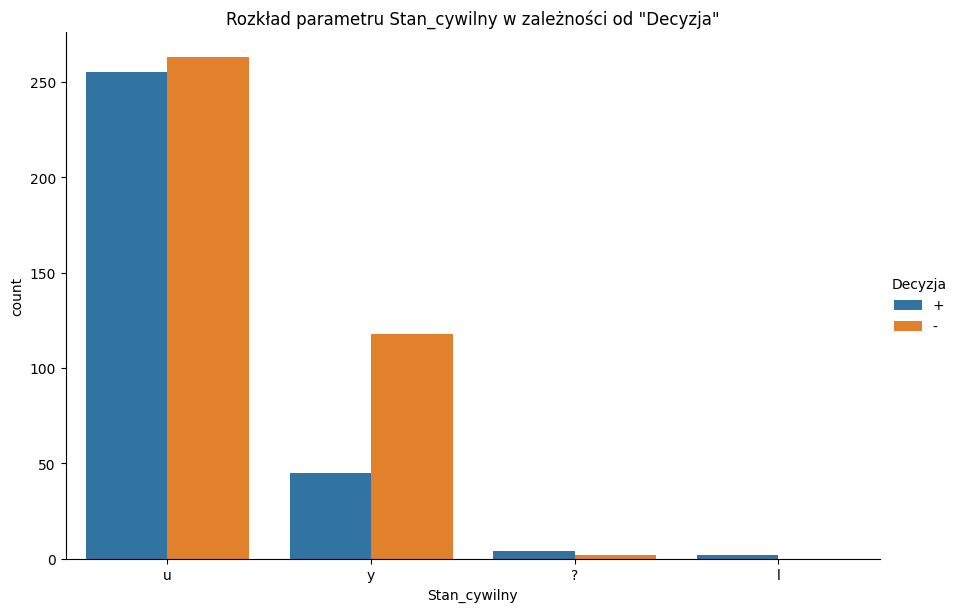

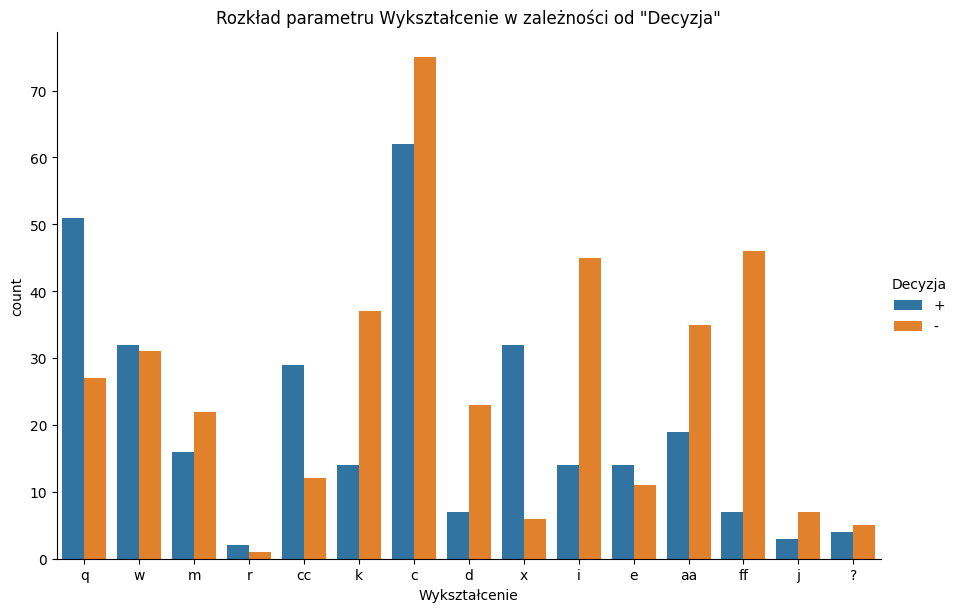

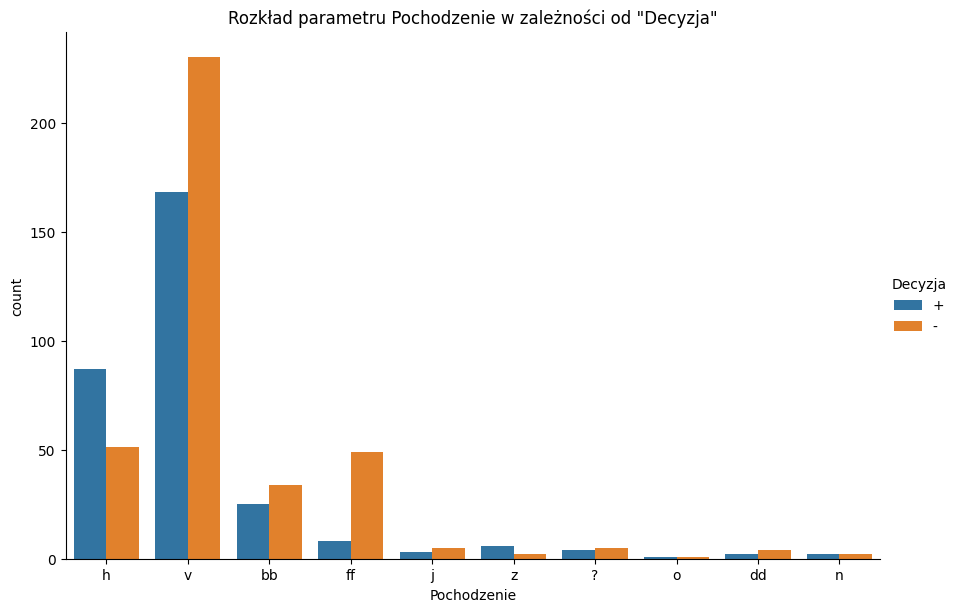

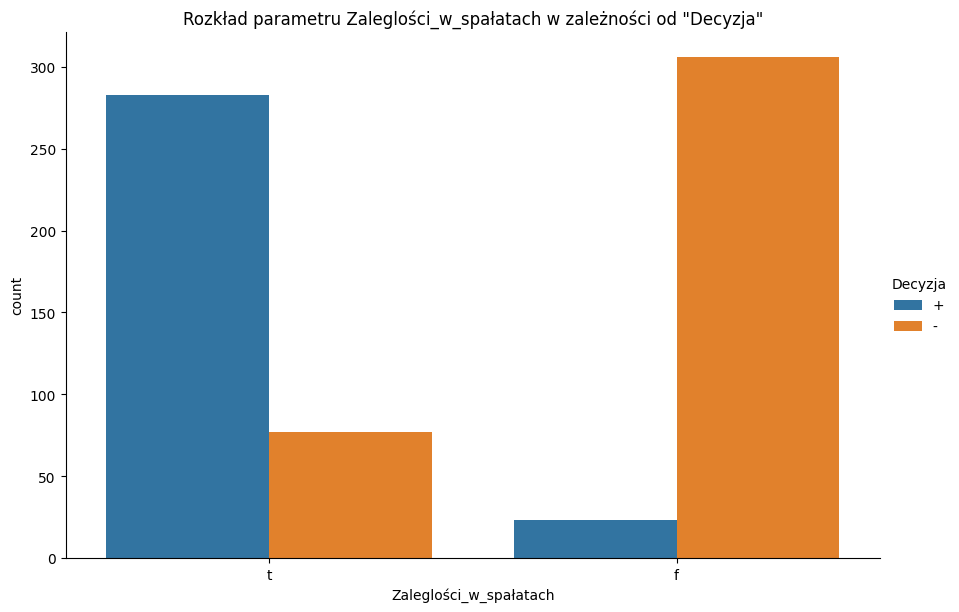

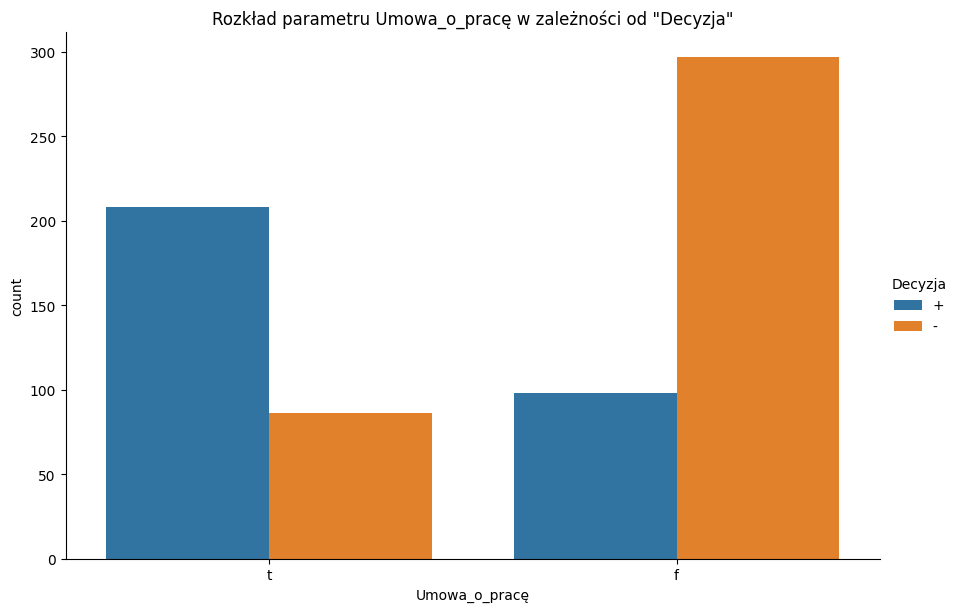

In [7]:
categorial_features = ['Stan_cywilny', 'Wykształcenie', 'Pochodzenie','Zaleglości_w_spałatach', 'Umowa_o_pracę',  ]

for column in categorial_features:
    sns.catplot(x=column, hue="Decyzja", kind="count", data=df, height=6, aspect=1.5)
    plt.title(f'Rozkład parametru {column} w zależności od "Decyzja"')
    plt.show()

In [8]:
unique_meanings_wyksztalcenie = df['Wykształcenie'].unique()
unique_meanings_wyksztalcenie

array(['q', 'w', 'm', 'r', 'cc', 'k', 'c', 'd', 'x', 'i', 'e', 'aa', 'ff',
       'j', '?'], dtype=object)

In [9]:
unique_meanings_pochodzenie = df['Pochodzenie'].unique()
unique_meanings_pochodzenie

array(['h', 'v', 'bb', 'ff', 'j', 'z', '?', 'o', 'dd', 'n'], dtype=object)

In [10]:
df['Stan_cywilny'].replace(['l','u','y'],[1,1,0], inplace=True)
df['Zaleglości_w_spałatach'].replace(['t','f'],[1,0], inplace=True)
df['Umowa_o_pracę'].replace(['t','f'],[1,0], inplace=True)
df['Decyzja'].replace(['+','-'],[1,0], inplace=True)
df

,Płeć,Wiek,Zadłużenie,Stan_cywilny,Bank,Wykształcenie,Pochodzenie,Lata_pracy,Zaleglości_w_spałatach,Umowa_o_pracę,Score_kredytowy,Prawo_jazdy,Obywatelstwo,Saldo_konta,Przychody,Decyzja
0,a,58.67,4.460,1,g,q,h,3.04,1,1,6,f,g,00043,560,1
1,a,24.50,0.500,1,g,q,h,1.50,1,0,0,f,g,00280,824,1
2,b,27.83,1.540,1,g,w,v,3.75,1,1,5,t,g,00100,3,1
3,b,20.17,5.625,1,g,w,v,1.71,1,0,0,f,s,00120,0,1
4,b,32.08,4.000,1,g,m,v,2.50,1,0,0,t,g,00360,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,0,p,e,h,1.25,0,0,0,f,g,00260,0,0
685,a,22.67,0.750,1,g,c,v,2.00,0,1,2,t,g,00200,394,0
686,a,25.25,13.500,0,p,ff,ff,2.00,0,1,1,t,g,00200,1,0
687,b,17.92,0.205,1,g,aa,v,0.04,0,0,0,f,g,00280,750,0


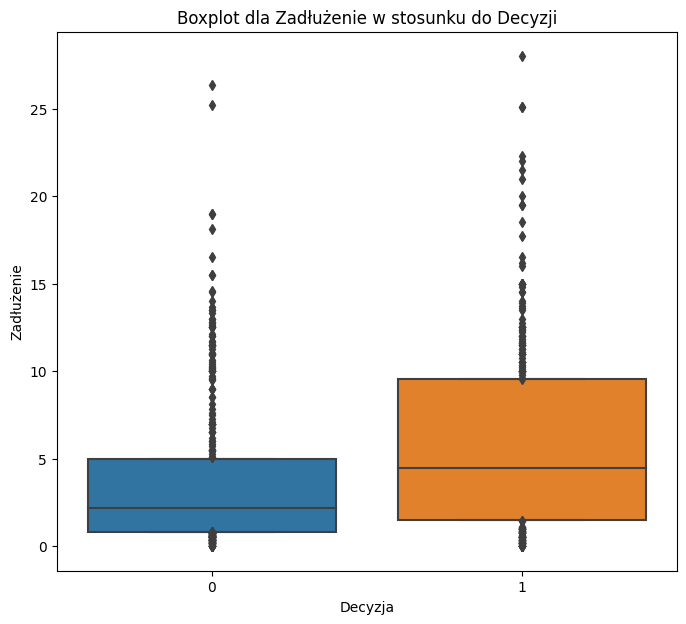

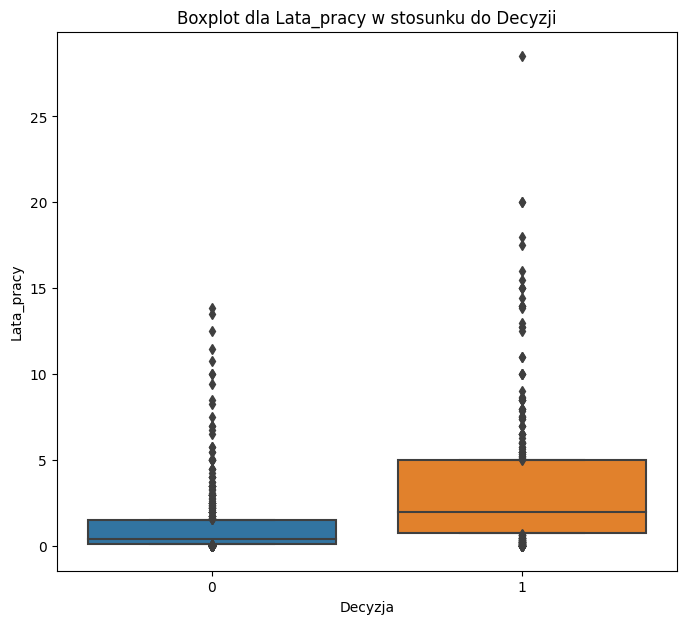

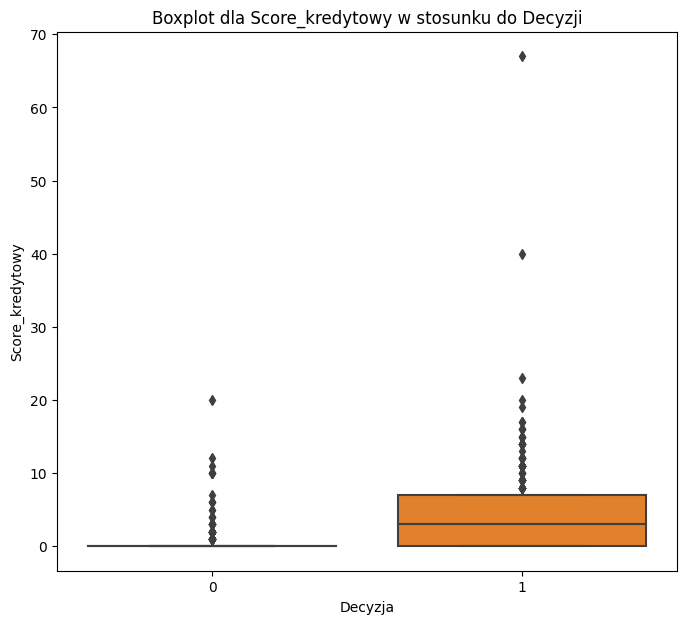

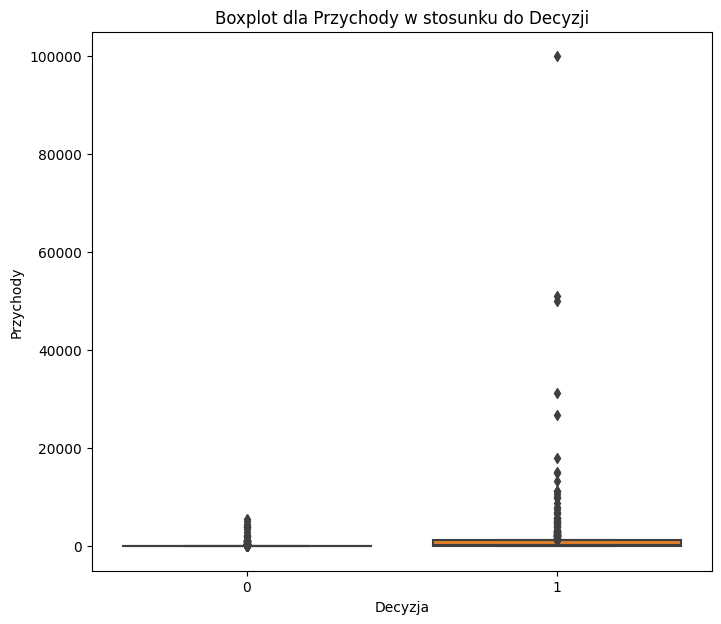

In [11]:
numeric_features = ['Zadłużenie', 'Lata_pracy', 'Score_kredytowy', 'Przychody']

# Tworzenie wykresów pudełkowych dla stosunku "Decyzja" do pozostałych kolumn
for column in numeric_features:
    plt.figure(figsize=(8,7))
    sns.boxplot(x='Decyzja', y=column, data=df, whis=0.0001)
    plt.title(f'Boxplot dla {column} w stosunku do Decyzji')
    plt.xlabel('Decyzja')
    plt.ylabel(column)
    plt.show()

In [12]:
df.replace('?', np.nan, inplace=True)
df.replace('1', np.nan, inplace=True)

In [13]:
df['Wiek']=df['Wiek'].astype(float)

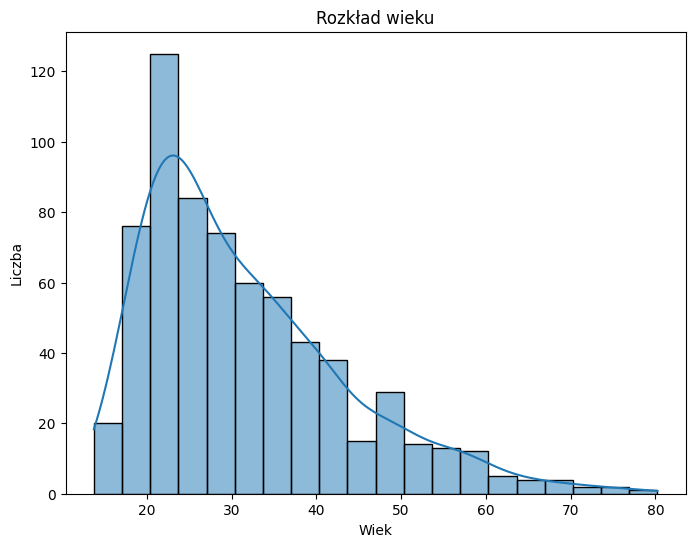

In [14]:
df.dropna(subset=['Wiek'], inplace=True)

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Wiek', bins=20, kde=True)
plt.title('Rozkład wieku')
plt.xlabel('Wiek')
plt.ylabel('Liczba')
plt.show()

In [15]:
#Usunięcie kolumn nie uwzględnianych w
columns_to_drop = ['Płeć','Bank', 'Prawo_jazdy', 'Obywatelstwo', 'Saldo_konta', 'Przychody']
df.drop(columns=columns_to_drop, inplace=True)

In [16]:
missing_or_unfulfilled_values = df[(df == '0').any(axis=1) | (df == '?').any(axis=1) | df.isnull().any(axis=1)]
missing_or_unfulfilled_values

,Wiek,Zadłużenie,Stan_cywilny,Wykształcenie,Pochodzenie,Lata_pracy,Zaleglości_w_spałatach,Umowa_o_pracę,Score_kredytowy,Decyzja
205,71.58,0.00,NaN,NaN,NaN,0.000,0,0,0,1
269,37.58,0.00,NaN,NaN,NaN,0.000,0,0,0,1
329,20.42,0.00,NaN,NaN,NaN,0.000,0,0,0,0
455,34.58,0.00,NaN,NaN,NaN,0.000,0,0,0,0
478,26.50,2.71,0.0,NaN,NaN,0.085,0,0,0,0
538,80.25,5.50,1.0,NaN,NaN,0.540,1,0,0,0
591,23.17,0.00,NaN,NaN,NaN,0.000,0,0,0,1
600,42.25,1.75,0.0,NaN,NaN,0.000,0,0,0,0
621,25.58,0.00,NaN,NaN,NaN,0.000,0,0,0,1


In [17]:
missing_or_unfulfilled_values.shape[0]

9

In [18]:
df = df.dropna()
df

,Wiek,Zadłużenie,Stan_cywilny,Wykształcenie,Pochodzenie,Lata_pracy,Zaleglości_w_spałatach,Umowa_o_pracę,Score_kredytowy,Decyzja
0,58.67,4.460,1.0,q,h,3.04,1,1,6,1
1,24.50,0.500,1.0,q,h,1.50,1,0,0,1
2,27.83,1.540,1.0,w,v,3.75,1,1,5,1
3,20.17,5.625,1.0,w,v,1.71,1,0,0,1
4,32.08,4.000,1.0,m,v,2.50,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
684,21.08,10.085,0.0,e,h,1.25,0,0,0,0
685,22.67,0.750,1.0,c,v,2.00,0,1,2,0
686,25.25,13.500,0.0,ff,ff,2.00,0,1,1,0
687,17.92,0.205,1.0,aa,v,0.04,0,0,0,0


In [19]:
# Stwórz słownik mapujący wartości 'Wykształcenie' na liczby
mapowanie_wyksztalcenia = {
    'q': 1,
    'w': 2,
    'm': 3,
    'r': 4,
    'cc': 5,
    'k': 6,
    'c': 7,
    'd': 8,
    'x': 9,
    'i': 10,
    'e': 11,
    'aa': 12,
    'ff': 13,
    'j': 14,
    '?': 0  # Możesz przypisać zero jako wartość dla brakujących danych
}

# Zastosuj mapowanie do kolumny "Wykształcenie"
df['Wykształcenie'] = df['Wykształcenie'].map(mapowanie_wyksztalcenia)


<ipython-input-19-a6661381b6fb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wykształcenie'] = df['Wykształcenie'].map(mapowanie_wyksztalcenia)


In [20]:
# Stwórz słownik mapujący wartości 'Pochodzenie' na liczby
mapowanie_pochodzenia = {
    'h': 1,
    'v': 2,
    'bb': 3,
    'ff': 4,
    'j': 5,
    'z': 6,
    '?': 0,  # Możesz przypisać zero jako wartość dla brakujących danych
    'o': 7,
    'dd': 8,
    'n': 9
}

# Zastosuj mapowanie do kolumny "Pochodzenie"
df['Pochodzenie'] = df['Pochodzenie'].map(mapowanie_pochodzenia)


<ipython-input-20-9a603ff27dc4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pochodzenie'] = df['Pochodzenie'].map(mapowanie_pochodzenia)


In [21]:
df['Wykształcenie']=df['Wykształcenie'].astype(float)
df['Pochodzenie'] = df['Pochodzenie'].astype(float)

<ipython-input-21-1b0735696fcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wykształcenie']=df['Wykształcenie'].astype(float)
<ipython-input-21-1b0735696fcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pochodzenie'] = df['Pochodzenie'].astype(float)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 688
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Wiek                    668 non-null    float64
 1   Zadłużenie              668 non-null    float64
 2   Stan_cywilny            668 non-null    float64
 3   Wykształcenie           668 non-null    float64
 4   Pochodzenie             668 non-null    float64
 5   Lata_pracy              668 non-null    float64
 6   Zaleglości_w_spałatach  668 non-null    int64  
 7   Umowa_o_pracę           668 non-null    int64  
 8   Score_kredytowy         668 non-null    int64  
 9   Decyzja                 668 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 57.4 KB


In [23]:
df.describe()

,Wiek,Zadłużenie,Stan_cywilny,Wykształcenie,Pochodzenie,Lata_pracy,Zaleglości_w_spałatach,Umowa_o_pracę,Score_kredytowy,Decyzja
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,31.452814,4.834237,0.764970,6.902695,2.238024,2.239491,0.528443,0.437126,2.470060,0.449102
std,11.770455,5.008304,0.424335,3.864395,1.248180,3.366219,0.499564,0.496403,4.924985,0.497775
min,13.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,1.000000,3.000000,2.000000,0.165000,0.000000,0.000000,0.000000,0.000000
50%,28.375000,2.855000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,38.190000,7.500000,1.000000,10.000000,2.000000,2.625000,1.000000,1.000000,3.000000,1.000000
max,76.750000,28.000000,1.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.000000,1.000000


#Moja część

In [24]:
# zdefiniuj zmienną
X = df[['Wiek', 'Zadłużenie', 'Stan_cywilny', 'Wykształcenie','Pochodzenie', 'Zaleglości_w_spałatach', 'Lata_pracy', 'Umowa_o_pracę', 'Score_kredytowy']]
y = df['Decyzja']

In [25]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
#Dummy Classifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
accuracy_dummy
# reslutat mówi iż predykcja w klasie wynosi  57,46% co za tym idzie jet to niska dokładność

0.5746268656716418

In [27]:
# # test and train set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [28]:
model_log = LogisticRegression(solver='lbfgs', max_iter=1000)
model_log.fit(X_test, y_test)

LogisticRegression(max_iter=1000)

In [29]:
# Make predictions on the test data
y_pred_log = model_log.predict(X_test)

# Evaluate the model's performance
accuracy_log = accuracy_score(y_test, y_pred_log)
confusion_log = confusion_matrix(y_test, y_pred_log)
class_rep = classification_report(y_test, y_pred_log)


In [30]:
# Print the results
print(f"Accuracy: {accuracy_log}")
print("Confusion Matrix:") #
print(confusion_log)
print("Classification Report:")
print(class_rep)

Accuracy: 0.8880597014925373
Confusion Matrix:
[[70  8]
 [ 7 49]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        78
           1       0.86      0.88      0.87        56

    accuracy                           0.89       134
   macro avg       0.88      0.89      0.89       134
weighted avg       0.89      0.89      0.89       134



# Klasa 0 to "-" Klasa 1 to "+"
## Accuracy
zdolność poprawnego sklasyfikowania w zestwie testowym
## Confusion Matrix
######Prawdziwie pozytywne (True Positives, TP): 49 próbek zostało poprawnie sklasyfikowanych jako pozytywne.
######Prawdziwie negatywne (True Negatives, TN): 70 próbek zostało poprawnie sklasyfikowanych jako negatywne.
######Fałszywie pozytywne (False Positives, FP): 8 próbek zostało błędnie sklasyfikowanych jako pozytywne.
######Fałszywie negatywne (False Negatives, FN): 7 próbek zostało błędnie sklasyfikowanych jako negatywne.
###Model poprawnie sklasyfikował większość próbek, ale dokonał także kilku błędnych klasyfikacji. Raport klasyfikacji daje ogólny obraz jakości modelu
## Classification Report
#####Precision (Precyzja):
Wynosi 0,86 dla klasy 1 i 0,91 dla klasy 0. Oznacza to, że 86% obiektów sklasyfikowanych jako klasa 1 oraz 91% obiektów sklasyfikowanych jako klasa 0 zostało poprawnie sklasyfikowanych.
####Recall (Czułość):
Wynosi 0,88 dla klasy 1 i 0,90 dla klasy 0. Oznacza to, że 88% obiektów z klasy 1 oraz 90% obiektów z klasy 0 zostało poprawnie wykrytych przez model.
####F1-score (Wskaźnik F1):
Jest to średnia harmoniczna precyzji i czułości. Wynosi 0,87 dla klasy 1 i 0,90 dla klasy 0. Jest to miara ogólnej jakości modelu klasyfikacji.
####Support (Wsparcie):
Określa liczbę próbek w danej klasie. Dla klasy 1 jest to 56 próbek, a dla klasy 0 jest to 78 próbek.

Accuracy (Dokładność): Już wspomniana na początku, wynosi 0,888.

In [31]:
iris = load_iris()
X = iris.data
y = iris.target
# bo jest prosty , zróżnicowany, rzecziwiste dane

In [32]:
rf_classifier= RandomForestClassifier()
# odporny na overfitting, odporność na niedobór danych

In [33]:
# Grid Search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
#Automatyzacja procesu, Unikanie overfittingu, Optymalizacja wydajności

In [34]:
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search

grid_search.fit(X_train, y_train)
#

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy')

In [35]:
param_dist = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': [2, 5, 10, 15, 20],

    'min_samples_leaf': [1, 2, 4, 8, 16]}

In [36]:

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
#Automatyzacja procesu, Unikanie overfittingu, Optymalizacja wydajności

In [37]:
# Perform the randomized search
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   random_state=42, scoring='accuracy')

In [38]:

# Print the best hyperparameters and corresponding accuracy
print("Best Grid Hyperparameters: ", grid_search.best_params_)
print("Best Grid  Accuracy: ", grid_search.best_score_)

# Print the best hyperparameters and corresponding accuracy
print("Best Random Hyperparameters: ", random_search.best_params_)
print("Best Random Accuracy: ", random_search.best_score_)

#Automatyzacja procesu, Unikanie overfittingu, Optymalizacja wydajności

Best Grid Hyperparameters:  {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}
Best Grid  Accuracy:  0.8744489508023277
Best Random Hyperparameters:  {'n_estimators': 40, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 70}
Best Random Accuracy:  0.8782401692823136


In [40]:
#Random forest:
rf_hype = {
    'n_estimators': 20,
    'max_depth': 30,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'random_state': 42
}
rf_model = RandomForestClassifier(**rf_hype)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8731343283582089

Dokładność: Random Forest jest znany z wysokiej dokładności predykcji. Działa dobrze zarówno dla problemów klasyfikacji, jak i regresji.

Odporność na overfitting: Random Forest jest stosunkowo odporny na nadmierne dopasowanie (overfitting) do danych treningowych. Dzięki temu jest bardziej ogólny i radzi sobie dobrze z nowymi danymi.

Wielość drzew: Algorytm tworzy wiele drzew decyzyjnych (stąd "Random Forest"), a następnie łączy wyniki tych drzew. Działa na zasadzie "więcej głów, więcej wie".

Wartości ważności cech: Random Forest pozwala ocenić ważność każdej cechy (np. zmiennych wejściowych), co może pomóc w zrozumieniu, które cechy mają największy wpływ na wyniki.

Działa zarówno dla danych liczbowych, jak i kategorialnych: Random Forest może obsługiwać różne rodzaje danych, co jest przydatne w praktycznych zastosowaniach.

Możliwość obsługi brakujących danych: Algorytm radzi sobie stosunkowo dobrze z brakującymi danymi bez konieczności ich usuwania.

Random Forest jest często używany w wielu dziedzinach, takich jak analiza danych, rozpoznawanie obrazów, przetwarzanie języka naturalnego, finanse i wiele innych. Jest to potężne narzędzie do tworzenia modeli predykcyjnych o wysokiej jakości.

#Point-Biserial Correlations:
#### Pomiar siły związku - pozwala zbadać, czy obecność lub brak pewnej kategorii wpływa na wartości zmiennej ilościowej,
####Pomiar siły związku - Wartość korelacji może wskazywać, czy istnieje silny, umiarkowany lub słaby związek między tymi zmiennymi.
#### Porównywanie grup - Używa się jej również do porównywania grup na podstawie zmiennej binarnej. Na przykład, można zbadać, czy istnieją istotne różnice w decyzji kredytowej

In [41]:
X = df[['Wiek', 'Zadłużenie', 'Stan_cywilny', 'Wykształcenie','Pochodzenie', 'Zaleglości_w_spałatach', 'Lata_pracy', 'Umowa_o_pracę', 'Score_kredytowy']]
y = df['Decyzja']

In [42]:
# Calculate the Point-Biserial Correlation coefficient for each feature
point_biserial_correlations = []
for column in X.columns:
    r, p = stats.pointbiserialr(X[column], y)
    point_biserial_correlations.append((column, r, p))

In [43]:
correlation_df = pd.DataFrame(point_biserial_correlations, columns=['Feature', 'Point-Biserial Correlation', 'p-value'])

In [44]:
print("Point-Biserial Correlations:")
print(correlation_df)

Point-Biserial Correlations:
                  Feature  Point-Biserial Correlation        p-value
0                    Wiek                    0.168928   1.136342e-05
1              Zadłużenie                    0.209310   4.755121e-08
2            Stan_cywilny                    0.181061   2.478831e-06
3           Wykształcenie                   -0.199377   2.040322e-07
4             Pochodzenie                   -0.128873   8.422699e-04
5  Zaleglości_w_spałatach                    0.738361  4.818131e-116
6              Lata_pracy                    0.329058   2.476470e-18
7           Umowa_o_pracę                    0.460291   2.466715e-36
8         Score_kredytowy                    0.409120   2.421042e-28


In [45]:
# Calculate the correlation matrix
correlation_matrix = X.corr()


Correlation Matrix:
                            Wiek  Zadłużenie  Stan_cywilny  Wykształcenie  \
Wiek                    1.000000    0.210697      0.098884       0.127286   
Zadłużenie              0.210697    1.000000      0.086035       0.072531   
Stan_cywilny            0.098884    0.086035      1.000000      -0.114539   
Wykształcenie           0.127286    0.072531     -0.114539       1.000000   
Pochodzenie             0.131865    0.076083     -0.032921       0.395516   
Zaleglości_w_spałatach  0.210837    0.240224      0.134134      -0.170583   
Lata_pracy              0.411792    0.296374      0.087641      -0.083455   
Umowa_o_pracę           0.095650    0.171043      0.168179      -0.148954   
Score_kredytowy         0.195554    0.268209      0.111053      -0.083930   

                        Pochodzenie  Zaleglości_w_spałatach  Lata_pracy  \
Wiek                       0.131865                0.210837    0.411792   
Zadłużenie                 0.076083                0.24022

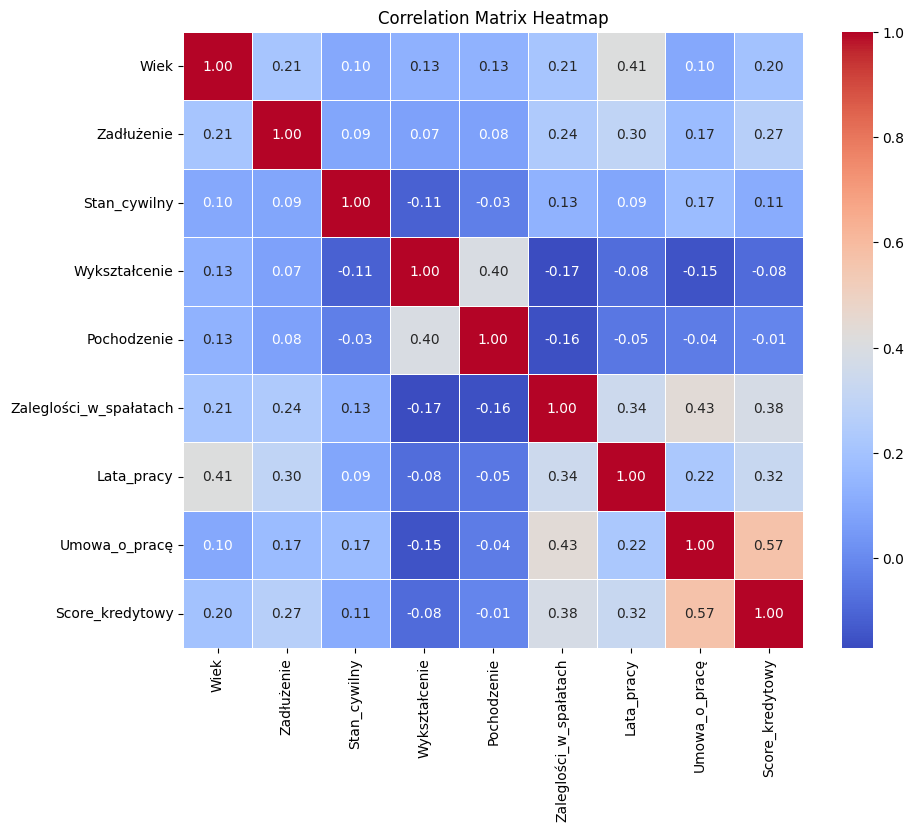

In [46]:
# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

####Ogólnie rzecz biorąc, te wyniki wskazują na istnienie statystycznie istotnych związków między badanymi cechami a decyzją. Na przykład, wyższy wynik kredytowy, dłuższy staż pracy i rodzaj umowy o pracę wydają się być pozytywnie skorelowane z większą szansą na pozytywną decyzję w sprawie kredytu. Z kolei wykształcenie i pochodzenie wydają się być negatywnie skorelowane z taką decyzją. Jednak każdy związek wymaga dodatkowej analizy i uwzględnienia kontekstu badawczego.

In [47]:
#Use Gradient Boosting for Classification
gb_cla = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_cla.fit(X_train, y_train)
y_pred_cla = gb_cla.predict(X_test)
accuracy_cla = accuracy_score(y_test, y_pred_cla)
print("Accuracy for Classification:", accuracy_cla)

Accuracy for Classification: 0.8656716417910447


####model ten poprawnie sklasyfikował 86.57% przypadków w zbiorze testowym.


#Decision Tree Classifire


In [48]:
clf = DecisionTreeClassifier(random_state=100)

In [49]:
# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [50]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [51]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.835820895522388


In [52]:
# Print the confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[67 11]
 [11 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        78
           1       0.80      0.80      0.80        56

    accuracy                           0.84       134
   macro avg       0.83      0.83      0.83       134
weighted avg       0.84      0.84      0.84       134



# Klasa 0 to "-" Klasa 1 to "+"
## Accuracy
zdolność poprawnego sklasyfikowania w zestwie testowym
## Confusion Matrix
######Prawdziwie pozytywne (True Positives, TP): 67 próbek zostało poprawnie sklasyfikowanych jako pozytywne.
######Prawdziwie negatywne (True Negatives, TN): 45 próbek zostało poprawnie sklasyfikowanych jako negatywne.
######Fałszywie pozytywne (False Positives, FP): 11 próbek zostało błędnie sklasyfikowanych jako pozytywne.
######Fałszywie negatywne (False Negatives, FN): 11 próbek zostało błędnie sklasyfikowanych jako negatywne.
###Model poprawnie sklasyfikował większość próbek, ale dokonał także kilku błędnych klasyfikacji. Raport klasyfikacji daje ogólny obraz jakości modelu
## Classification Report
#####Precision (Precyzja):
Wynosi 0,80 dla klasy 1 i 0,86 dla klasy 0. Oznacza to, że 80% obiektów sklasyfikowanych jako klasa 1 oraz 86% obiektów sklasyfikowanych jako klasa 0 zostało poprawnie sklasyfikowanych.
####Recall (Czułość):
Wynosi 0,88 dla klasy 1 i 0,90 dla klasy 0. Oznacza to, że 88% obiektów z klasy 1 oraz 90% obiektów z klasy 0 zostało poprawnie wykrytych przez model.
####F1-score (Wskaźnik F1):
Jest to średnia harmoniczna precyzji i czułości. Wynosi 0,87 dla klasy 1 i 0,90 dla klasy 0. Jest to miara ogólnej jakości modelu klasyfikacji.
####Support (Wsparcie):
Określa liczbę próbek w danej klasie. Dla klasy 1 jest to 56 próbek, a dla klasy 0 jest to 78 próbek.

Accuracy (Dokładność): Już wspomniana na początku, wynosi 0,888.